# Regresion de la distancia Ortogonal

$$y = mx +n $$
Dado $(x_0,y_0)$, se define la distancia entre el punto y la recta anterior como:
$$d=\frac{|y_0-(mx_0+b)|}{\sqrt{m^2+1}}$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [32]:
session = tf.Session()

In [33]:
iris = datasets.load_iris()

In [34]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [35]:
batch_size = 50
learning_rate = 0.1

In [36]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
m = tf.Variable(tf.random_normal(shape=[1,1]))
n = tf.Variable(tf.random_normal(shape=[1,1]))

In [37]:
y_predict = tf.add(tf.matmul(x_data, m), n)

In [38]:
deming_num = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data,m), n)))
demin_den = tf.sqrt(tf.add(tf.square(m), 1.0))
deming_loss = tf.reduce_mean(tf.truediv(deming_num, demin_den))

In [39]:
init = tf.global_variables_initializer()
session.run(init)

In [40]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(deming_loss)

In [41]:
loss_vect = []
for i in range(300):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    temp_loss = session.run(deming_loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    if(i+1)%20==0:
        print("Paso #"+str(i+1)+", m = "+str(session.run(m))+", n = "+str(session.run(n))+
             "Loss: "+str(temp_loss))

Paso #20, m = [[2.571845]], n = [[1.7521224]]Loss: 0.49901238
Paso #40, m = [[2.8009734]], n = [[1.9900658]]Loss: 0.46162465
Paso #60, m = [[2.824155]], n = [[2.096013]]Loss: 0.39963356
Paso #80, m = [[2.7671444]], n = [[2.1449108]]Loss: 0.45378342
Paso #100, m = [[2.771173]], n = [[2.2360723]]Loss: 0.43743265
Paso #120, m = [[2.7076213]], n = [[2.2855275]]Loss: 0.42828858
Paso #140, m = [[2.6613007]], n = [[2.3543015]]Loss: 0.46294603
Paso #160, m = [[2.6318855]], n = [[2.429371]]Loss: 0.43533143
Paso #180, m = [[2.575179]], n = [[2.477372]]Loss: 0.42090154
Paso #200, m = [[2.504405]], n = [[2.5248313]]Loss: 0.41548157
Paso #220, m = [[2.4702752]], n = [[2.5991738]]Loss: 0.3749264
Paso #240, m = [[2.431184]], n = [[2.6687453]]Loss: 0.456139
Paso #260, m = [[2.3916545]], n = [[2.7475479]]Loss: 0.44808537
Paso #280, m = [[2.3426156]], n = [[2.824972]]Loss: 0.44308406
Paso #300, m = [[2.2913804]], n = [[2.9091315]]Loss: 0.4542739


In [42]:
[[slope]] = session.run(m)
[[intercept]] = session.run(n)
print(str(slope)+"x+"+str(intercept))

2.2913804x+2.9091315


In [43]:
best_fit = []
for i in x_vals: 
    best_fit.append(slope * i +intercept)

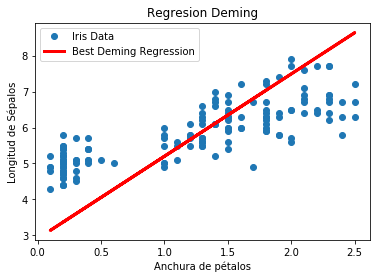

In [44]:
plt.plot(x_vals, y_vals, 'o', label = "Iris Data")
plt.plot(x_vals, best_fit, 'r-', label = "Best Deming Regression", linewidth = 3)
plt.legend(loc = "upper left")
plt.title("Regresion Deming")
plt.xlabel("Anchura de pétalos")
plt.ylabel("Longitud de Sépalos")
plt.show()

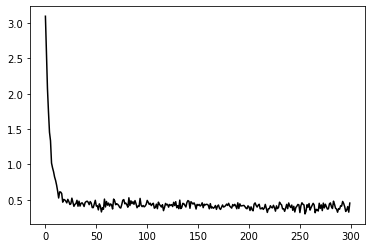

In [45]:
plt.plot(loss_vect, 'k-', label="Función de pérdidas")